#离散傅里叶变换
##描述
傅里叶变换时图像处理的重要部分，他将图像的分解成cos和sin分量。变换的结果就是在频域当中的图像表示。在傅里叶域，每个像素都表示了，在空域图像中包含的一个固定的频率。
##工作原理
由于我们计算的是图像，所以只考虑离散的情况：离散傅里叶变换（DFT）

DFT是经过采样（简化）的傅里叶变换，并未包含图像中所有的频率。但是采样的集合足以完整的描述空域的图像。

频率的数量和像素的数量相同。ie.在空域的图像尺寸，和傅里叶域的尺寸一样。

对于一张$N*N$的图像，它的二维DFT变换表示为：
$$F(k,l)=\sum^{N-1}_{i=0}\sum^{N-1}_{j=0}f(i,j)e^{-\iota2\pi(\frac{ki}{N}+\frac{kj}{N})}$$
f(a,b)是空域中的值，指数项（e）是每个频域点F(k,l)在不同像素点的基函数。

这个等式可以解释为Z（DFT）：频域每一个点，都是通过空域图像和相应基函数相乘并求和而得到的。

基函数是频率递增的sin或cos波，例如：F（0，0），表示DF成分的平均亮度，F（N-1,N-1)则表示最高频的成分。

和这个过程相同，傅里叶也可以转换会空间域。转换公式如下:
$$f(a,b)=\frac{1}{N^2}\sum^{N-1}_{k=0}\sum^{N-1}_{l=0}F(k,l)e^{\iota2\pi(\frac{ka}{N}+\frac{lb}{N})}$$
$\frac{1}{N^2}$常态化项，主要是在反转换的过程中进行正规化。这一项有时应用在正向变化，有时应用在反向变化，但是不能同时都使用。

###计算简化

由于以上的等式，每一个点都需要进行两次求和（$\sum\sum$）。然而应为傅里叶变化是可以分解的，所以可以写成：
$$F(k,l) = \frac{1}{N}\sum^{N-1}_{b=0}P(k,b)e^{-\iota2\pi\frac{lb}{N}}$$
其中：
$$P(k,b)=\frac{1}{N}\sum^{N-1}_{a=0}f(a,b)e^{-\iota2\pi\frac{ka}{N}}$$
通过中间过程，空域图像首先转换成了N个一维的傅里叶变换。然后再将中间结果计算成最终结果。

最终的计算有N*N降低到了2N次的傅里叶一维变换。

###快速傅里叶变换
对于一般的一维傅里叶变换而言，时间复杂度为$N^2$，而通过快速傅里叶变换可以将计算复杂度降低到$N\log_2{N}$,快速傅里叶变化对图像的大小是有要求的：$N=2^n$,具体的证明在相关文献中有说明。

傅里叶变换能够产生一个复数值来作为图像输出，可以显示成实部和虚部两幅图像。或者成为振幅和相位。在图像处理过程中，我们往往只关注振幅图像。它包含了大部分空域图像的几何结构信息。然而如果需要恢复原始的正确图像,振幅和相位都需要保持。

###使用指导

大部分的傅里叶变换的实现都是转换过的，也就是DC-value在图片的中心，他等于图像均值。
为了更好的显示变化情况，需要取log后显示。

In [1]:
import skimage
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from skimage import color
from skimage import io

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体

Populating the interactive namespace from numpy and matplotlib


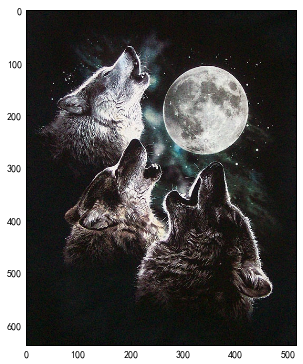

In [2]:
img = io.imread("3wolfmoon.jpg")

plt.figure(figsize=(8,6), dpi=80)
plt.imshow(img)

In [3]:
img_lab = color.rgb2lab(img)

print u'Lab空间参数'
print img_lab.shape ,img_lab.dtype
print img_lab[:,:,0].min() , img_lab[:,:,0].max()
print img_lab[:,:,1].min() , img_lab[:,:,1].max()
print img_lab[:,:,2].min() , img_lab[:,:,2].max()

Lab空间参数
(639L, 516L, 3L) float64
0.0 100.0
-23.373241847 20.5018262924
-21.0168949234 24.938527034


[[ 5.09263671  8.35022177  7.58593895 ...,  5.26639376  4.7209515
   6.67976496]
 [ 6.00948588  8.04539801  7.31970302 ...,  3.31919871  4.17905717
   5.54290749]
 [ 8.00920891  8.74193744  7.24728604 ...,  3.82329931  6.59521201
   4.94709863]
 ..., 
 [ 5.44191247  7.65258867  5.81539456 ...,  4.94709863  6.18436904
   7.1001346 ]
 [ 3.40516632  5.15804536  4.38224246 ...,  4.65924444  5.44038267
   5.85766422]
 [ 3.91089663  4.40246424  3.83561131 ...,  6.04644192  5.62139927
   4.09873849]]
[[ 162.53375736  170.67772     168.76701294 ...,  162.96814998
   161.60454433  166.50157797]
 [ 164.82588027  169.9156606   168.10142312 ...,  158.10016234  160.2498085
   163.65943429]
 [ 169.82518784  171.65700918  167.92038067 ...,  159.36041384
   166.29019559  162.16991214]
 ..., 
 [ 163.40694674  168.93363726  164.34065198 ...,  162.16991214
   165.26308818  167.55250206]
 [ 158.31508138  162.69727897  160.75777171 ...,  161.45027667
   163.40312224  164.44632613]
 [ 159.57940715  160.8083

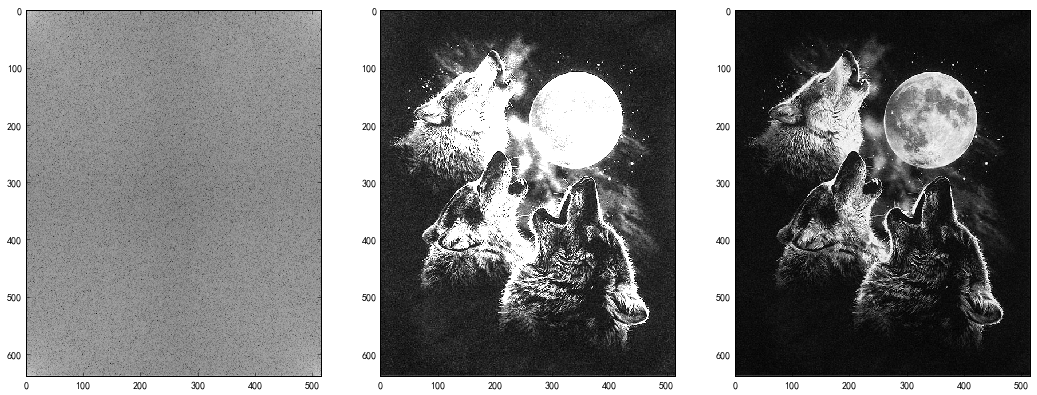

In [4]:
img_gray = img_lab[:,:,0]
b = np.fft.fft2(img_gray*2.5)
print img_gray
plt.figure(figsize=(18,16), dpi=80)

plt.subplot(1,3,1)
b[0,0] = b[0,0]*4
br = np.log(np.abs(b.real))
plt.imshow(br,cmap=cm.gray, interpolation="none")

c = np.fft.ifft2(b).real
mask = c>255
c[mask] = 255
plt.subplot(1,3,2)
plt.imshow(c,cmap=cm.gray, interpolation="none")
print c
plt.subplot(1,3,3)
plt.imshow(img_gray,cmap=cm.gray, interpolation="none")


[[ 116.  116.  122. ...,   93.   96.   96.]
 [ 116.  116.  122. ...,   93.   96.   96.]
 [ 116.  116.  122. ...,   93.   96.   96.]
 ..., 
 [ 109.  109.  112. ...,  117.  116.  116.]
 [ 114.  114.  113. ...,  118.  118.  118.]
 [ 114.  114.  113. ...,  118.  118.  118.]]
(29404580+0j)


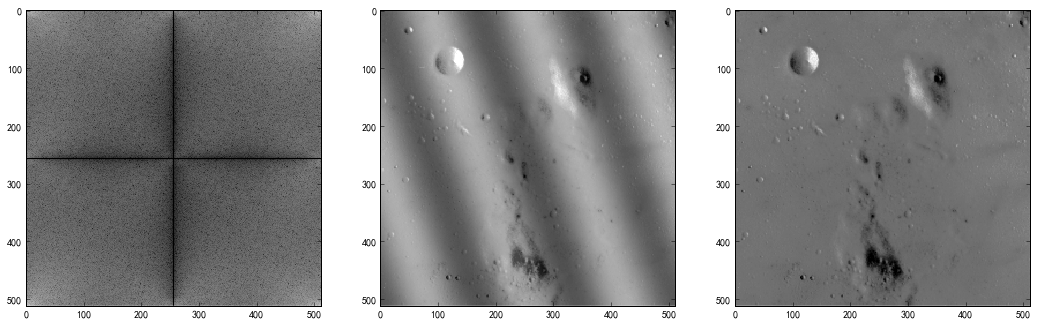

In [21]:
from skimage import data
da = data.moon()

img_gray = np.asarray(da,dtype='float64')

print img_gray

b = np.fft.fft2(img_gray)
#b[b.shape[0]/2,b.shape[1]/2] = b[b.shape[0]/2,b.shape[1]/2]*3
print b[0,0]
#b[b.shape[0]-1,b.shape[1]-1]=b[2,b.shape[1]-1].real*200
b[1,b.shape[1]-3]=b[1,b.shape[1]-3].real*2000
plt.figure(figsize=(18,16), dpi=80)
plt.subplot(1,3,1)
br = np.log(np.abs(b)+1)
plt.imshow(br,cmap=cm.gray, interpolation="none")


c = np.fft.ifft2(b).real
plt.subplot(1,3,2)

#这一步非常关键，如果过大，imshow会主动对图像的范围进行压缩。
mask = c>255
c[mask] = 255

plt.imshow(c,cmap=cm.gray, interpolation="none")
#print c.shape
#print c.real

plt.subplot(1,3,3)
plt.imshow(data.moon(),cmap=cm.gray, interpolation="none")